# Book: Machine Learning with PyTorch and Scikit-Learn  


Recommendation: Machine Learning Andre NG

# Previous Chapter: Building Good Training Datasets – Data Preprocessing

- We learned about the different approaches for reducing the dimensionality of a dataset using different **feature selection techniques**

- An alternative approach to **feature selection for dimensionality reduction is feature extraction**


# Chapter 5 - Compressing Data via Dimensionality Reduction


- In this chapter, we will learn about two fundamental techniques for feature extraction from a dataset`

    - Principal component analysis for **unsupervised** data compression 
  
    - Linear discriminant analysis as a **supervised** dimensionality reduction technique for maximizing class separability 

![](2022-09-04-13-49-43.png)

### Feature selection vs Feature Extraction

- we maintain the original features when we use feature selection algorithms, such as sequential backward selection, 

- we use feature extraction to transform or project the data onto a new feature space.

![](2022-09-04-13-52-31.png)

![](2022-09-04-13-53-06.png)

> In Dimensionality reduction, feature extraction can be understood as an approach to data compression with the goal of maintaining most of the relevant information. 

## Benefits
Feature extraction can prove helpful when training a machine learning model. It leads to:

- A Boost in training speed
  
- An improvement in model accuracy
  
- A reduction in risk of overfitting
  
- A rise in model explainability
  
- Better data visualization

Similar to feature selection, we can use different feature extraction techniques to reduce the number of features in a dataset. 


## Feature extraction techniques
The following is a list of some common feature extraction techniques used by the Machine Learning community:

- Principle Components Analysis (PCA)

- Independent Component Analysis (ICA)

- Linear Discriminant Analysis (LDA)

- Locally Linear Embedding (LLE)

- t-distributed Stochastic Neighbor Embedding (t-SNE)

# Unsupervised dimensionality reduction via principal component analysis

- principal component analysis (PCA), an unsupervised linear transformation technique for feature extraction and dimensionality reduction. 
  
- PCA is used for other applications include exploratory data analysis and the denoising of signals in stock market trading, and the analysis of genome data and gene expression levels in the field of bioinformatics.

In [137]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## The main steps behind principal component analysis

- PCA helps us to identify patterns in data based on the correlation between features. 

- PCA aims to find the directions of maximum variance in high-dimensional data and projects the data onto a new subspace with equal or fewer dimensions than the original one. 

- The orthogonal axes (principal components) of the new subspace can be interpreted as the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other, as illustrated

> Variance tells you the degree of spread in your data set. The more spread the data, the larger the variance is in relation to the mean.



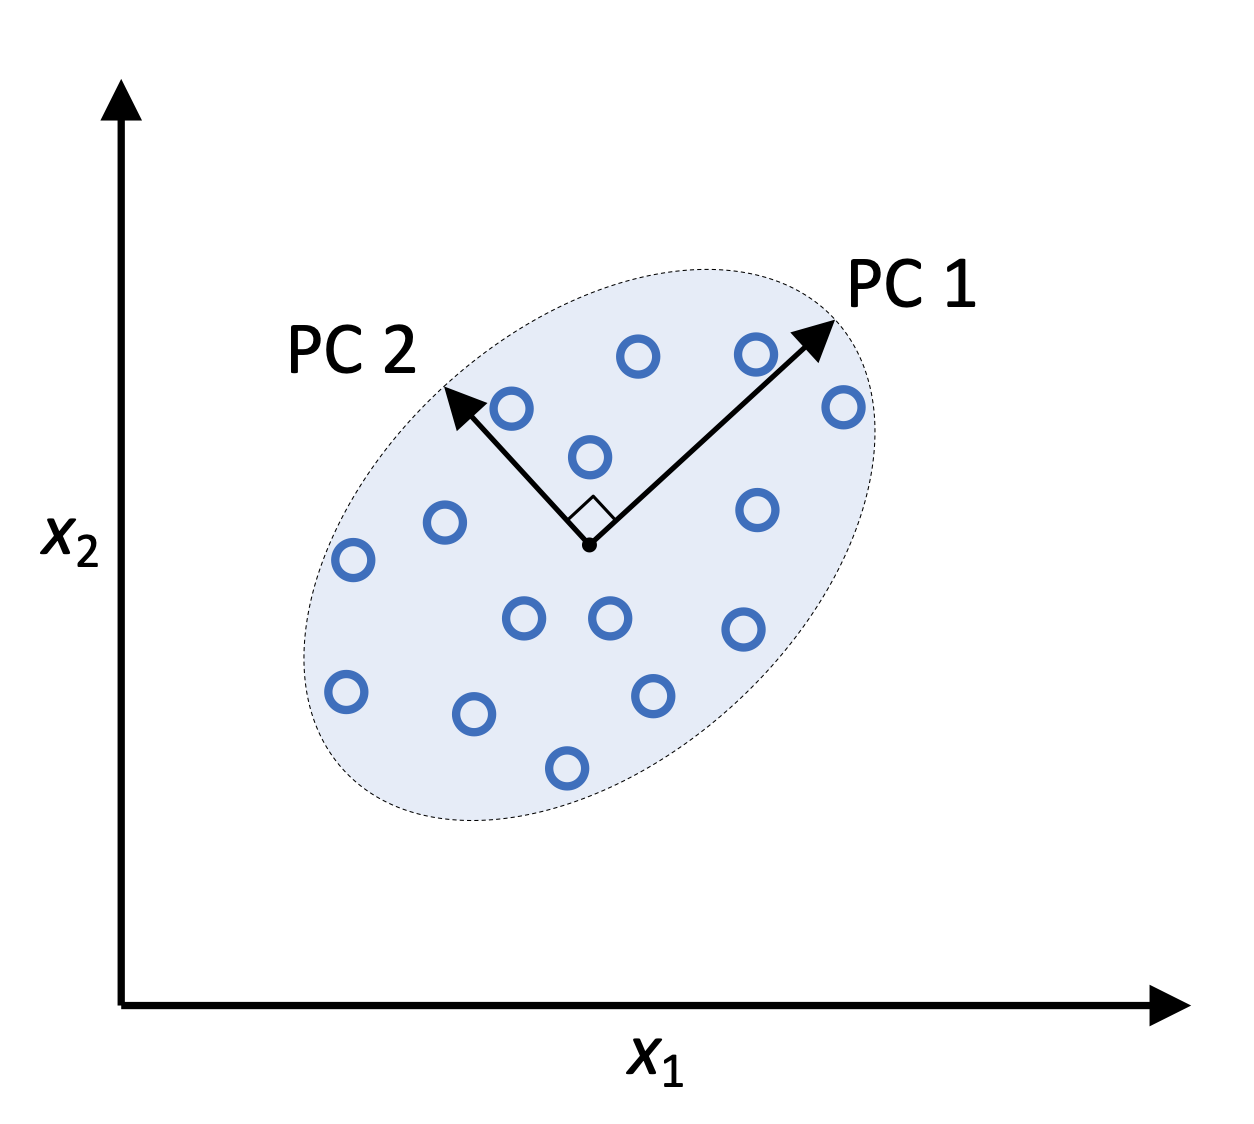

In [138]:
Image(filename='figures/05_01.png', width=400) 

## Principal components in Sklearn

In [246]:
import pandas as pd


df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [184]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

In [285]:
pd.DataFrame(df_wine.iloc[:, 1:].values)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Splitting the data into 70% training and 30% test subsets.

In [143]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [182]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.4,0.91,2.05,550.0
1,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.4,1.25,3.00,1235.0
2,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.7,1.19,2.71,1285.0
3,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.2,1.10,2.87,1095.0
4,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.1,0.73,1.58,695.0


In [181]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0
1,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0
2,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
3,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
4,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0


> Note that the PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features

Standardizing the data.

In [254]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)

Function to plot decision boundry


In [248]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

## Principal component analysis in scikit-learn

In [250]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

### Explained Varience Ratio

The explained variance ratio is the percentage of variance that is attributed by each of the selected components

In [251]:
pca.explained_variance_ratio_

array([0.3695, 0.1843, 0.1182, 0.0733, 0.0642, 0.0505, 0.0395, 0.0264,
       0.0239, 0.0163, 0.0138, 0.0117, 0.0082])

We can then calculate the cumulative sum of explained variances

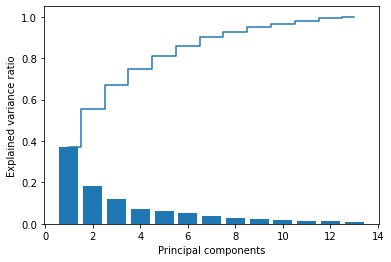

In [252]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [253]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

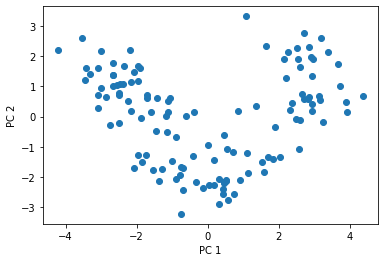

In [199]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [234]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

Training logistic regression classifier using the first 2 principal components.

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

By executing this code, we should now see the decision regions for the training data reduced to two principal component axes

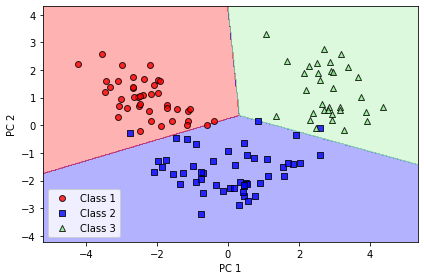

In [237]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_04.png', dpi=300)
plt.show()

## Explained variance


In [244]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.3695, 0.1843, 0.1182, 0.0733, 0.0642, 0.0505, 0.0395, 0.0264,
       0.0239, 0.0163, 0.0138, 0.0117, 0.0082])

We can then calculate the cumulative sum of explained variances

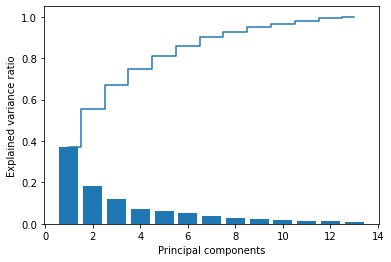

In [245]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

- The resulting plot indicates that the first principal component alone accounts for approximately 40 percent of the variance. 

- Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the dataset

- Although the explained variance plot reminds us of the feature importance values that we computed in Chapter 4, Building Good Training Datasets – Data Preprocessing, via random forests, we should remind ourselves that PCA is an unsupervised method, which means that information about the class labels is ignored. Whereas a random forest uses the class membership information to compute the node impurities, variance measures the spread of values along a feature axis.

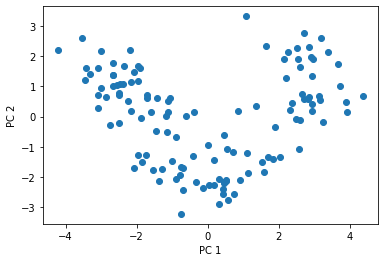

In [240]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Assessing feature contributions

- We can assess the contributions of the original features to the principal components.

- PCA create principal components that represent linear combinations of the features. 
  
- Sometimes, we are interested to know about how much each original feature contributes to a given principal component. 

- These contributions are often called loadings.

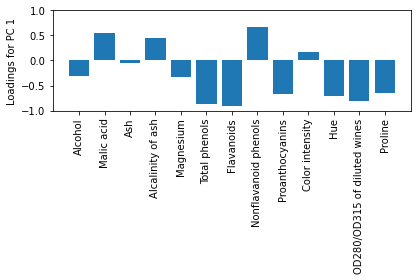

In [241]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()

ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()

# Supervised data compression via linear discriminant analysis

> LDA can be used as a technique for feature extraction to increase computational efficiency and reduce the degree of overfitting due to the curse of dimensionality in non-regularized models

> Linear discriminant analysis is used as a tool for classification, dimension reduction, and data visualization.

## Principal component analysis versus linear discriminant analysis

- Both PCA and LDA are linear transformation techniques that can be used to reduce the number of dimensions in a dataset; the former is an unsupervised algorithm, whereas the latter is supervised. 

- Thus, we might think that LDA is a superior feature extraction technique for classification tasks compared to PCA. 
  
- However a PCA tends to result in better classification results in an image recognition task in certain cases, for instance, if each class consists of only a small number of examples 

> LDA is sometimes also called Fisher’s LDA. Ronald A. Fisher initially formulated Fisher’s Linear Discriminant for two-class classification problems in 1936.

## LDA via scikit-learn

let’s look at the LDA class implemented in scikit-learn: >>> # the following import statement is one line

In [280]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

Reduced dimension

In [281]:
pd.DataFrame(X_train_lda).head()

,0,1
0,-0.654580,0.144858
1,-0.372279,-0.606882
2,0.372702,-0.619719
3,-0.447948,1.242208
4,0.970152,-0.776265


In [259]:
pd.DataFrame(X_train_std).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.712259,2.220487,-0.130259,0.059629,-0.504327,-0.528316,-1.240000,0.841180,-1.052151,-0.292189,-0.200170,-0.821641,-0.629464
1,0.882292,-0.704572,1.175336,-0.090655,2.341479,1.016759,0.662995,1.088743,-0.492935,0.131521,1.339826,0.549313,1.475688
2,0.845856,-0.730230,1.175336,0.811048,0.135979,1.098079,1.163267,-0.644195,1.252496,0.258634,1.068062,0.130811,1.629349
3,0.578661,-0.473646,0.988823,-0.240939,0.776285,0.040922,0.457000,-0.644195,-0.170963,-0.376931,0.660416,0.361708,1.045438
4,-0.526554,0.090839,-0.689799,-0.391223,-0.362037,-1.146346,-1.377330,2.161513,-1.187719,0.851827,-1.015462,-1.499903,-0.183848


### LDA Visualization

Next, let’s see how the logistic regression classifier handles the lower-dimensional training dataset after the LDA transformation:

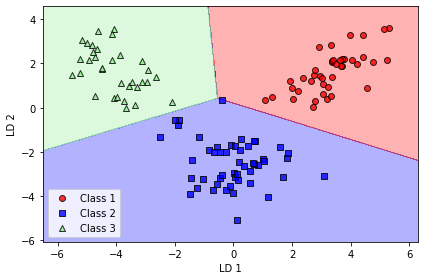

In [268]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_09.png', dpi=300)
plt.show()

### LDA for Classification

In [282]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [287]:
# train test
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X, y)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

Variance explained by each component:

In [276]:
lda.explained_variance_ratio_

array([0.6486, 0.3514])

In [288]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2)

#### Accuracy Score

In [289]:
from sklearn.metrics import accuracy_score
y_pred = lda.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


### Confusion Matrix

In [290]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 23,  0],
       [ 0,  0, 16]])

# Nonlinear dimensionality reduction techniques

- We covered linear transformation techniques, such as PCA and LDA, for feature extraction. 
  
- In this section, we will discuss why considering nonlinear dimensionality reduction techniques might be worthwhile.

- One nonlinear dimensionality reduction technique that is particularly worth highlighting is t-distributed stochastic neighbor embedding (t-SNE) since it is frequently used in literature to visualize high-dimensional datasets in two or three dimensions. 

- We will see how we can apply t-SNE to plot images of handwritten images in a 2-dimensional feature space

## Why consider nonlinear dimensionality reduction?

- If we are dealing with nonlinear problems, which we may encounter rather frequently in real-world applications, linear transformation techniques for dimensionality reduction, such as PCA and LDA, may not be the best choice:

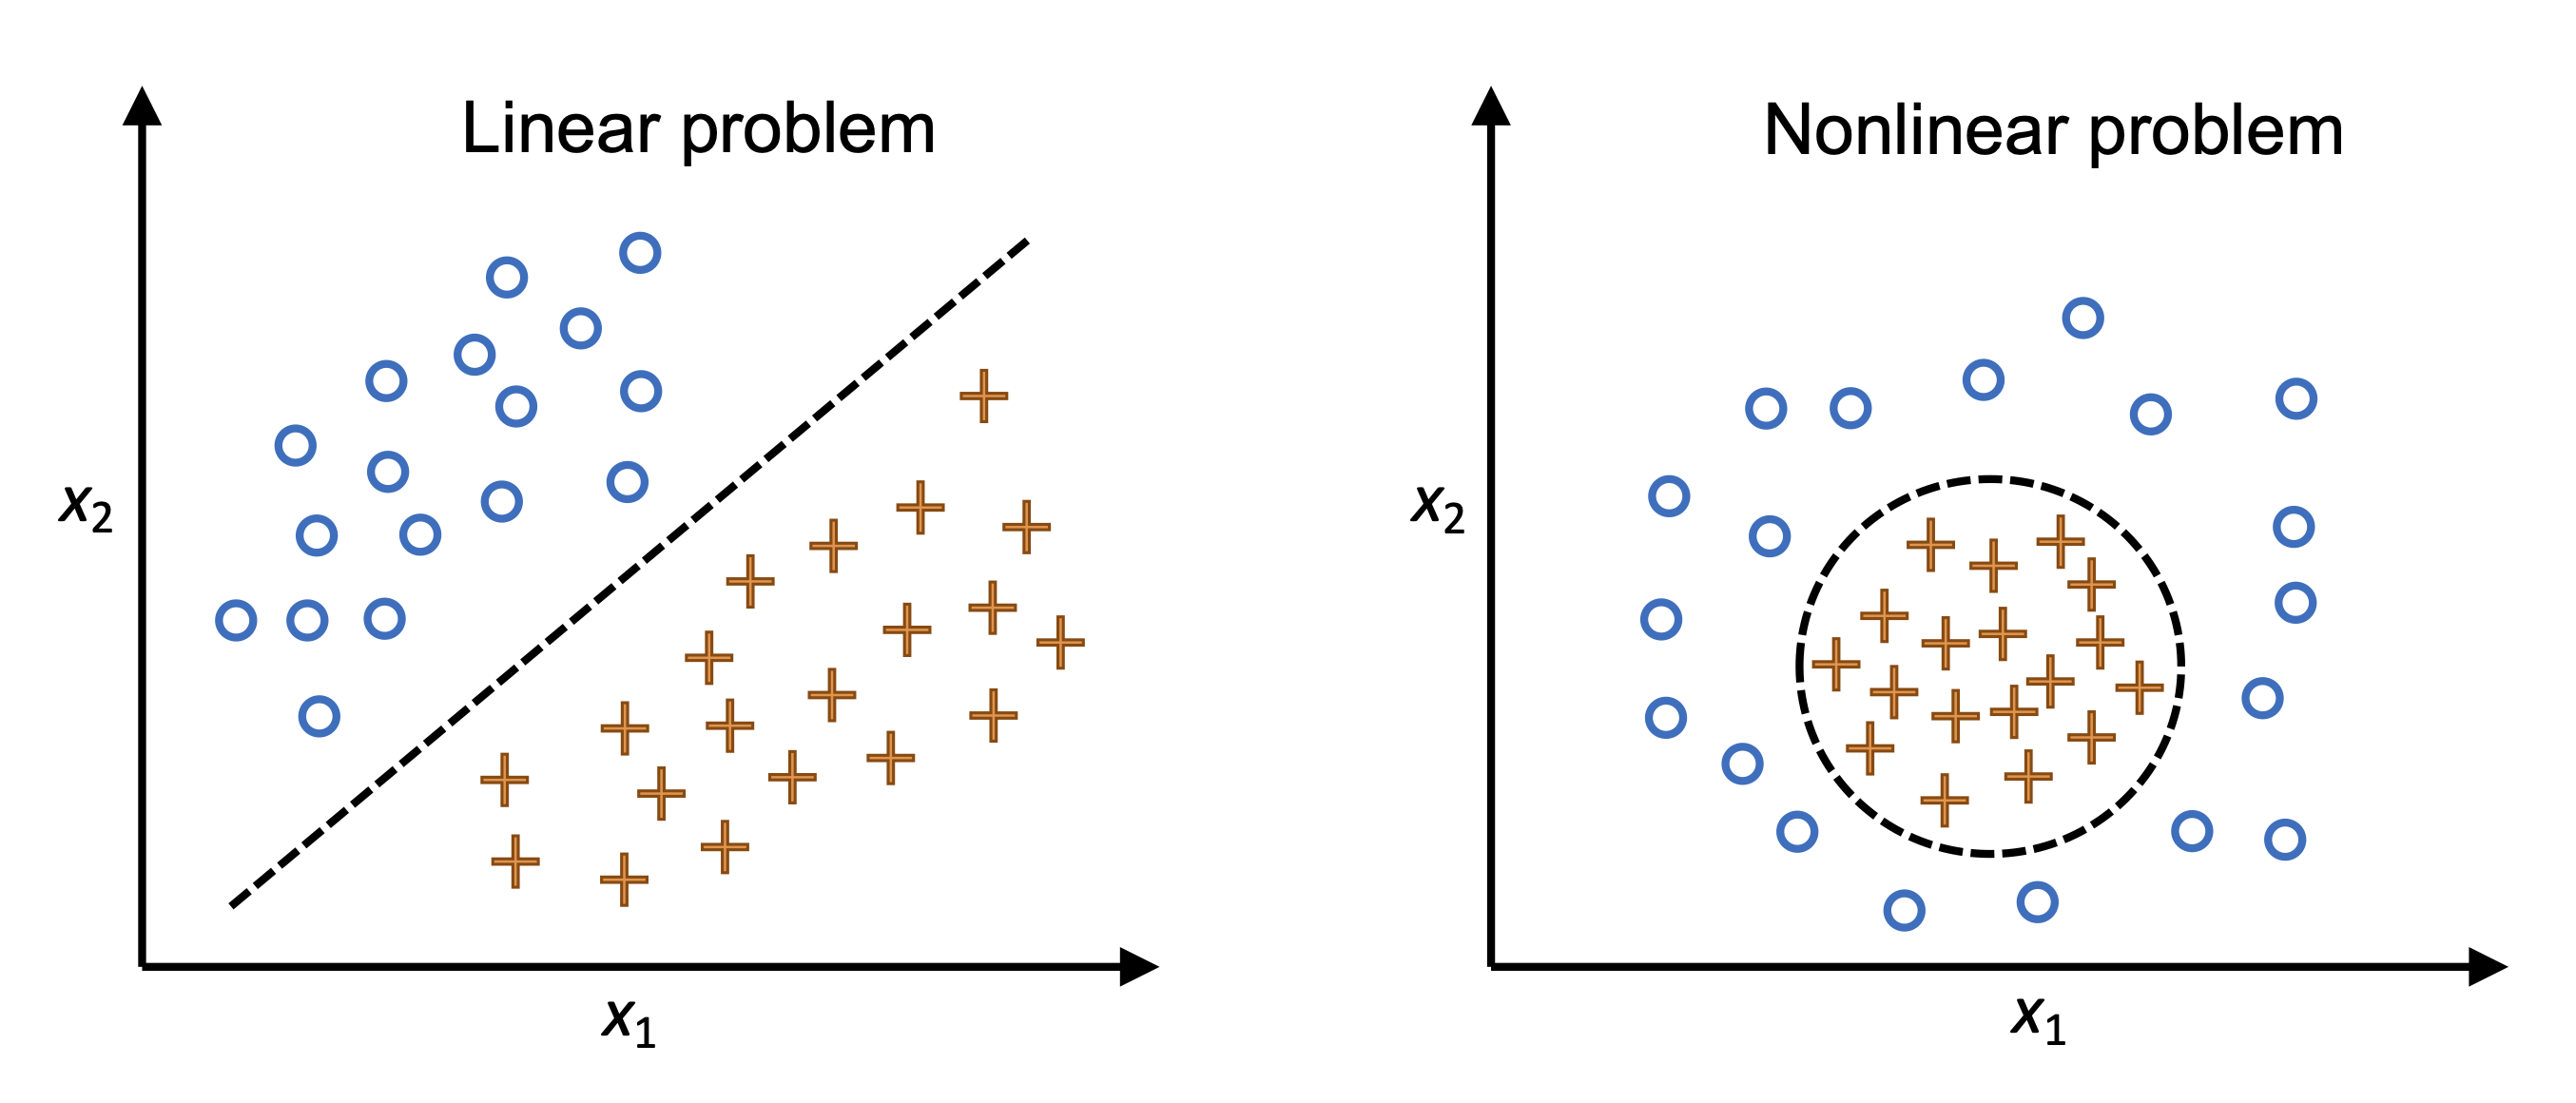

In [173]:
Image(filename='figures/05_11.png', width=500) 

> The scikit-learn library implements a selection of advanced techniques for nonlinear dimensionality reduction that are beyond the scope of this book. The interested reader can find a nice overview of the current implementations in scikit-learn, complemented by illustrative examples, at http://scikitlearn.org/stable/modules/manifold.html

> The development and application of nonlinear dimensionality reduction techniques is also often referred to as manifold learning, where a manifold refers to a lower dimensional topological space embedded in a high-dimensional space. Algorithms for manifold learning have to capture the complicated structure of the data in order to project it onto a lower-dimensional space where the relationship between data points is preserved

### Visualizing data via t-distributed stochastic neighbor embedding

- let’s take a look at a hands-on example involving t-SNE, which is often used for visualizing complex datasets in two or three dimensions.

- t-SNE is a technique intended for visualization purposes
  
- The following code shows a quick demonstration of how t-SNE can be applied to a 64-dimensional dataset. First, we load the Digits dataset from scikit-learn, which consists of low-resolution handwritten digits (the numbers 0-9)

> The digits are 8×8 grayscale images. The following code plots the 
first four images in the dataset, which consists of 1,797 images in total:

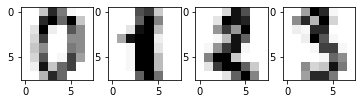

In [231]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, ax = plt.subplots(1, 4)

for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys') # ploating first four images
    
# plt.savefig('figures/05_12.png', dpi=300)
plt.show() 

In [291]:
digits.data.shape

(1797, 64)

In [292]:
y_digits = digits.target
X_digits = digits.data

Using this code below, we projected the 64-dimensional dataset onto a 2-dimensional space. We specified init='pca', which initializes the t-SNE embedding using PCA.

In [220]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2,
            init='pca',
            random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [222]:
X_digits_tsne

array([[ -3.3684,  58.087 ],
       [ 25.9412, -18.591 ],
       [ 17.8263,  -7.6884],
       ...,
       [  9.1123, -12.0166],
       [-18.0838,  28.5017],
       [  5.4381,  -8.0773]], dtype=float32)

let us visualize the 2D t-SNE embeddings using the following code:

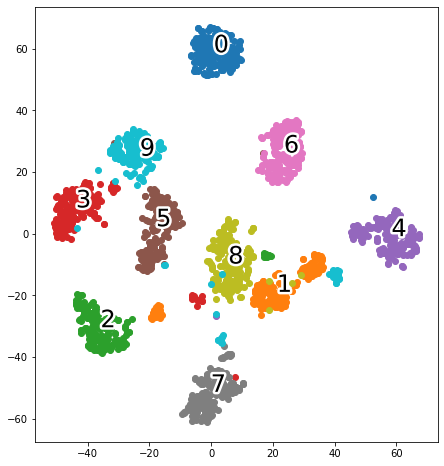

In [232]:
import matplotlib.patheffects as PathEffects


def plot_projection(x, colors):
    
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])

    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        
plot_projection(X_digits_tsne, y_digits)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()

- As we can see, t-SNE is able to separate the different digits (classes) nicely, although not perfectly. 

- It might be possible to achieve better separation by tuning the hyperparameters. 

- However, a certain degree of class mixing might be unavoidable due to illegible handwriting. 
  
- For instance, by inspecting individual images, we might find that certain instances of the number 3 indeed look like the number 9, and so forth.

# Summary

- In this chapter, we learned about two fundamental dimensionality reduction techniques for feature extraction: PCA and LDA. 
  
- Using PCA, we projected data onto a lower-dimensional subspace to maximize the variance along the orthogonal feature axes. 

- LDA, in contrast to PCA, is a technique for supervised dimensionality reduction, which means that it considers class information in the training dataset to attempt to maximize the class separability in a linear feature space. 
  
- We also learned about t-SNE, which is a nonlinear feature extraction technique that can be used for visualizing data in two or three dimensions. 